<a href="https://colab.research.google.com/github/allineBrito/CAGED/blob/main/caged%20outubro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dados CAGED OUTUBRO/2022**

---





In [1]:
import statistics as stats
from itertools import chain
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams
%matplotlib inline

#Link dos Microdados do Caged: http://pdet.mte.gov.br/
##A base de dados fornece dados atualizados de forma mensal, para análise foi ultilizada apenas a base de outubro de 2022

# ***Oraganização e limpeza da base***

In [2]:
cols =[
    'município', 
    'seção',
    'categoria',
    'graudeinstrução',
    'sexo',
    'tipomovimentação',
    'raçacor',
    'idade',
    'tipodedeficiência',
    'salário'
]
newcols=[
    'municipio',
    'secao',
    'categoria',
    'instrucao',
    'genero',
    'tipo',
    'tipomovimentação',
    'raca',
    'idade',
    'tipodedeficiência',
    'salario'
]
a = list(string.ascii_uppercase)
del(a[21:25] )
genero = ['M','F','N/I']
secao = [
    'Agricultura/Pecuária',
    'Ind. Extrativas',
    'Ind. Transformação',
    'Eletricidade/Gás',
    'Água/Esgoto',
    'Construção',
    'Comércio',
    'Transporte',
    'Alimentação',
    'Informação',
    'Financeiros',
    'Imobiliárias',
    'Profissionais',
    'Administrativas',
    'Adm Pública',
    'Educação',
    'Saúde',
    'Artes/Cultura',
    'Outros Serviços',
    'Domésticos',
    'Org. Internacionais',
    'Não Identificados',
]

In [3]:
##df_ss.columns = (df_ss.iloc[1] + '_' + df_ss.iloc[0]) Criando o cabeçalho a partir da agregação entre primeira e segunda linha

In [4]:
df = pd.read_csv('/content/drive/MyDrive/fies/CAGEDEXC202210.txt',sep=';', usecols=cols)

In [5]:
data = pd.read_csv('/content/drive/MyDrive/fies/CAGEDEXC202210.txt', sep=';', low_memory=False, decimal=",")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   município          6236 non-null   int64  
 1   seção              6236 non-null   object 
 2   categoria          6236 non-null   int64  
 3   graudeinstrução    6236 non-null   int64  
 4   idade              6207 non-null   float64
 5   raçacor            6236 non-null   int64  
 6   sexo               6236 non-null   int64  
 7   tipomovimentação   6236 non-null   int64  
 8   tipodedeficiência  6236 non-null   int64  
 9   salário            5615 non-null   object 
dtypes: float64(1), int64(7), object(2)
memory usage: 487.3+ KB


In [7]:
#transformar em valor financeiro
df['salário']=df['salário'].apply(lambda x :  str(x).replace(',','.'))
df['salário']=df['salário'].apply(lambda x :  str(x).replace('nan','0'))
df['salário']=pd.to_numeric(df['salário'], downcast="float")
df['salário']=df['salário'].apply(lambda x: round(x,2))

In [8]:
conditions = [
    (df['tipomovimentação'].isin([10,20,25,35,70])),
    (df['tipomovimentação'].isin([31,32,33,40,43,45,50,60,80,90,98])),
    (df['tipomovimentação'].isin([99]))
    ]
values = ['Admitido', 'Desligado', 'Não identificado']

df['tipomovimentação'] = np.select(conditions, values)

In [9]:
df['tipomovimentação'].unique()

array(['Admitido', 'Desligado', '0'], dtype=object)

In [10]:
sexo = {1: 'Homem', 3: 'Mulher' , 9:'Não identificado'}
raçacor = {1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena', 6:'Não informada', 9: 'Não identificado'}
graudeinstrução = {1:'Analfabeto', 2:'Até 5ª Incompleto', 3:'5ª Completo Fundamental',
                          4:'6ª a 9ª Fundamental', 5:'Fundamental Completo', 6:'Médio Incompleto',
                          7:'Médio Completo', 8:'Superior Incompleto', 9:'Superior Completo',
                          10:'Mestrado', 11:'Doutorado', 80:'Pós-Graduação completa', 99:'Não Identificado'}
seção = {'A':'Agricultura, Pecuária, Produção Florestal, Pesca e Aquicultura', 
              'B':'Indústrias Extrativas', 'C':'Indústrias de Transformação', 'D':'Eletricidade e Gás', 
              'E':'Água, Esgoto, Atividades de Gestão de Resíduos e Descontaminação', 'F':'Construção', 
              'G':'Comércio, Reparação de Veículos Automotores e Motocicletas', 'H':'Transporte, Armazenagem e Correio', 
              'I':'Alojamento e Alimentação', 'J':'Informação e Comunicação', 'K':'Atividades Financeiras, de Seguros e Serviços Relacionados', 
              'L':'Atividades Imobiliárias', 'M':'Atividades Profissionais, Científicas e Técnicas', 
              'N':'Atividades Administrativas e Serviços Complementares', 'O':'Administração Pública, Defesa e Seguridade Social', 
              'P':'Educação', 'Q':'Saúde Humana e Serviços Sociais', 'R':'Artes, Cultura, Esporte e Recreação',
              'S':'Outras Atividades de Serviços', 'T':'Serviços Domésticos', 
              'U':'Organismos Internacionais e Outras Instituições Extraterritoriais', 'Z':'Não identificado'}

tipodedeficiência = {
    1:'Fisica',
    2:'Auditiva',
    3:'Visual',
    4:'Intelectual(Mental)',
    5:'Multipla',
    6:'Nao deficiente',
    0:'Nao deficiente',
    -1:'ignorado'}

categoria = {101: 'Geral, inclusive o empregado público da administração direta ou indireta', 102:' Trabalhador rural',
             103:'Aprendiz', 104: 'Doméstico', 105: 'Contrato a termo firmado nos termos da Lei 9.601/1998',
             106: 'Trabalhador temporário', 107: 'Contrato de trabalho Verde e Amarelo - sem acordo para antecipação mensal do FGTS', 108: 'ontrato de trabalho Verde e Amarelo - com acordo para antecipação mensal do FGTS',
             111: 'Contrato de trabalho intermitente', 999: 'Não Identificado'
            
    
}

df = df.replace({'sexo': sexo, 'raçacor': raçacor, 'seção': seção, 'tipodedeficiência' : tipodedeficiência, 'graudeinstrução': graudeinstrução, 'categoria':categoria})   


In [11]:
df.isnull().sum()

município             0
seção                 0
categoria             0
graudeinstrução       0
idade                29
raçacor               0
sexo                  0
tipomovimentação      0
tipodedeficiência     0
salário               0
dtype: int64

In [12]:
conditions = [
    ((df['idade'] >= 0) & (df['idade'] <= 19)),
    ((df['idade'] >= 20) & (df['idade'] <= 59)),
    (df['idade'] >= 60)
    ]

values = ['Jovem', 'Adulto', 'Idoso']

df['idade'] = np.select(conditions, values)

In [13]:
df['tipomovimentação'].value_counts(normalize=True)*100

Desligado    52.822322
0            43.954458
Admitido      3.223220
Name: tipomovimentação, dtype: float64

**Em out/22 o número de desligamentos foi maior que o número de admitidos**

---





In [14]:
#Separando Demitidos e Admitidos
demitidos = df[df["tipomovimentação"] == 'Desligado']
admitidos = df[df["tipomovimentação"] == 'Admitido']

In [15]:
print("Salário Médio:", demitidos['salário'].mean())
print("Salário Min:", demitidos['salário'].min())
print("Salário máximo:", demitidos['salário'].max())

Salário Médio: 1943.793806921676
Salário Min: 0.0
Salário máximo: 274639.19


# ***Análises***


#  **Analisando as diferenças entre homens e mulheres**


*   Quantidade de admitidos e demitidos;
*   Média salarial;

*   Contratados por setor;
*   List item









In [16]:
from IPython.display import Markdown
df_admitidos = df[df['tipomovimentação']=='Admitido']
df_desligados = df[df['tipomovimentação']=='Desligado']

hired_men = df_admitidos[df_admitidos['sexo']=='Homem']['sexo'].count()
hired_women = df_admitidos[df_admitidos['sexo']=='Mulher']['sexo'].count()
hired_gender_diff = abs(hired_men - hired_women)

fired_men = df_desligados[df_desligados['sexo']=='Homem']['sexo'].count()
fired_women = df_desligados[df_desligados['sexo']=='Mulher']['sexo'].count()
fired_gender_diff = abs(fired_men - fired_women)

Markdown("""### Quantidade de admissões/demissões por gênero 
| |Homens|Mulheres| Diferença |
|---| ---  |   ---  | --- |
|Adimitidos | {0:,} | {1:,} | {2:,} |
|Desligados| {3:,} | {4:,} | {5:,} |

""".format(hired_men, hired_women, hired_gender_diff, fired_men, fired_women, fired_gender_diff))

### Quantidade de admissões/demissões por gênero 
| |Homens|Mulheres| Diferença |
|---| ---  |   ---  | --- |
|Adimitidos | 120 | 81 | 39 |
|Desligados| 1,916 | 1,378 | 538 |



In [17]:
def calcula_diferenca(x, y):
    if x == y:
        return 0
    try:
        return ((abs(x - y) / y) * 100.0).round()
    except ZeroDivisionError:
        return float('inf')

mediaSalarioMulher = df.query('sexo == "Mulher"')
mediaSalarioMulher = mediaSalarioMulher['salário'].mean().round()

mediaSalarioHomem = df.query('sexo == "Homem"')
mediaSalarioHomem = mediaSalarioHomem['salário'].mean().round()

print(f'salário médio de mulheres: {mediaSalarioMulher}\nsalário médio de homens: {mediaSalarioHomem}\n\nDiferença = {calcula_diferenca(mediaSalarioHomem, mediaSalarioMulher)}%')


salário médio de mulheres: 1954.0
salário médio de homens: 2385.0

Diferença = 22.0%


In [18]:
from IPython.display import Markdown
mulher = admitidos[admitidos['sexo']=='Mulher']['salário'].mean()
homem = admitidos[admitidos['sexo']=='Homem']['salário'].mean()
diferenca = abs(mulher - homem)
Markdown("""# Diferença da média salarial entre homens e mulheres admitidos
#### Salário médio de homens admitidos: {0:,.2f}    
#### Salário médio de mulheres admitidas: {1:,.2f}
### Diferença: {2:,.2f}

""".format(mulher, homem, diferenca))

# Diferença da média salarial entre homens e mulheres admitidos
#### Salário médio de homens admitidos: 3,674.71    
#### Salário médio de mulheres admitidas: 4,806.84
### Diferença: 1,132.13



In [19]:
from IPython.display import Markdown
Mulher = demitidos[demitidos['sexo']=='Mulher']['salário'].mean()
Homem = demitidos[demitidos['sexo']=='Homem']['salário'].mean()
diferenca = abs(Mulher - Homem)
Markdown("""# Diferença da média salarial entre homens e mulheres demitidos
#### Salário médio de homens demitidos: {0:,.2f}    
#### Salário médio de mulheres demitidos: {1:,.2f}
### Diferença: {2:,.2f}

""".format(Mulher, Homem, diferenca))

# Diferença da média salarial entre homens e mulheres demitidos
#### Salário médio de homens demitidos: 1,636.99    
#### Salário médio de mulheres demitidos: 2,164.45
### Diferença: 527.46



In [20]:
demitidos.groupby('categoria')['sexo'].value_counts (normalize=True)*100

categoria                                                                         sexo  
 Trabalhador rural                                                                Homem     100.000000
Aprendiz                                                                          Mulher     66.525424
                                                                                  Homem      33.474576
Contrato a termo firmado nos termos da Lei 9.601/1998                             Homem      93.413174
                                                                                  Mulher      6.586826
Contrato de trabalho intermitente                                                 Homem      78.873239
                                                                                  Mulher     21.126761
Geral, inclusive o empregado público da administração direta ou indireta          Homem      58.464928
                                                                                  Mulhe

In [21]:
tableRGen = pd.pivot_table(admitidos, values= ['graudeinstrução'], index=['raçacor'],
                    columns=['sexo'], aggfunc= 'count')
tableRGen

graudeinstrução       
sexo                    Homem Mulher
raçacor                             
Branca                     31     21
Não informada              36     12
Parda                      43     46
Preta                      10      2

#  **Analisando as diferenças de cor ou raça**


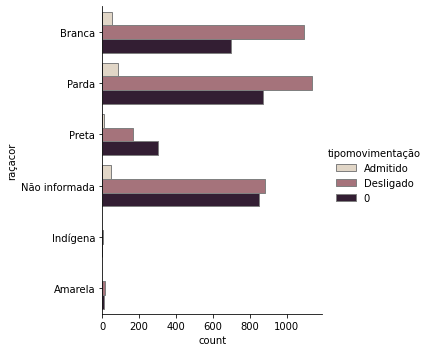

In [22]:
sns.catplot(y="raçacor", hue="tipomovimentação", kind="count",
            palette="ch:.25", edgecolor=".5",
            data=df);

In [23]:
dfPes = pd.DataFrame(admitidos['raçacor'].value_counts())
dfPes['Proporção'] = round((dfPes['raçacor'] * 100)/dfPes['raçacor'].sum(),1)
dfPes.sort_index()

,raçacor,Proporção
Branca,52,25.9
Não informada,48,23.9
Parda,89,44.3
Preta,12,6.0


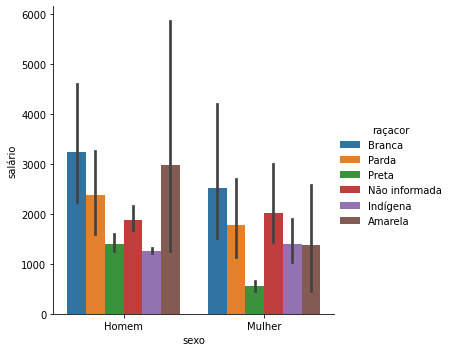

In [24]:
sns.catplot(x="sexo", y="salário", hue="raçacor", kind="bar", data=df);

In [25]:
relacao = admitidos
relacao[['salário','graudeinstrução', 'idade', 'sexo','raçacor']].groupby(['graudeinstrução','raçacor'])\
.mean().sort_values(by='salário', ascending=False).round(2).reset_index()

,graudeinstrução,raçacor,salário
0,Superior Completo,Branca,29566.66
1,Superior Completo,Não informada,8659.20
2,Médio Completo,Parda,4710.34
3,Pós-Graduação completa,Parda,2655.00
4,Superior Completo,Parda,1588.21
5,Médio Incompleto,Parda,1524.00
6,Superior Incompleto,Branca,1519.82
7,Médio Completo,Branca,1414.78
8,6ª a 9ª Fundamental,Branca,1407.50
9,Médio Incompleto,Não informada,1287.10


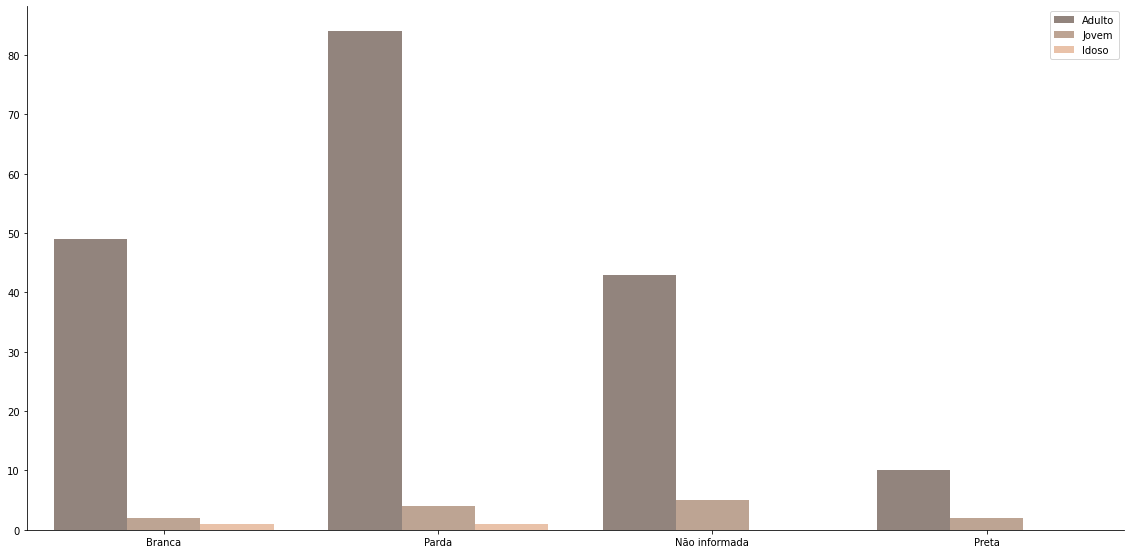

In [26]:
g = sns.catplot(
    data=admitidos, kind="count",
    x="raçacor", hue="idade",
    ci="sd", palette="copper", alpha=.6, height=8, aspect=2, legend_out=False)
g.set_axis_labels("", "")
g.legend.set_title("")
g.ax.legend(loc=1);

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   município          6236 non-null   int64  
 1   seção              6236 non-null   object 
 2   categoria          6236 non-null   object 
 3   graudeinstrução    6236 non-null   object 
 4   idade              6236 non-null   object 
 5   raçacor            6236 non-null   object 
 6   sexo               6236 non-null   object 
 7   tipomovimentação   6236 non-null   object 
 8   tipodedeficiência  6236 non-null   object 
 9   salário            6236 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 487.3+ KB


# ***Outras análises***

In [28]:

def plot(get_chart, xlabel=None, ylabel=None, title=None , figsize=(10,6), xticks=None):
    titledict = {'fontweight':'bold', 'fontsize': 15}
    labeldict = {'fontsize': 13}
    plt.figure(figsize = figsize)
    ax = get_chart()
    title and ax.set_title(title + "\n", fontdict=titledict)
    xlabel and ax.set_xlabel(xlabel, fontdict=labeldict)
    xlabel and ax.set_ylabel(ylabel, fontdict=labeldict)
    plt.show()

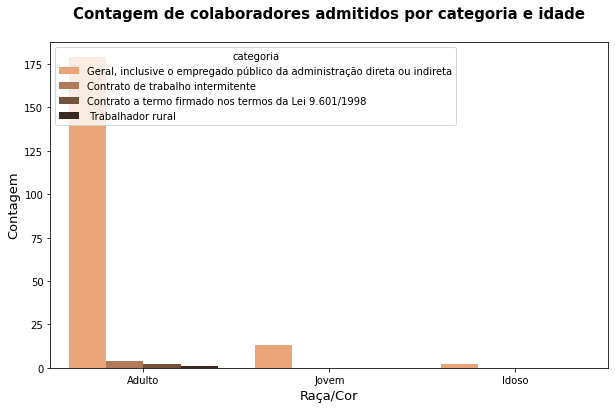

In [33]:
plot(
    get_chart = lambda: sns.countplot(x='idade', hue='categoria',data = admitidos, palette='copper_r'),
    title = "Contagem de colaboradores admitidos por categoria e idade",
    xlabel = "Raça/Cor",
    ylabel = "Contagem",
     )

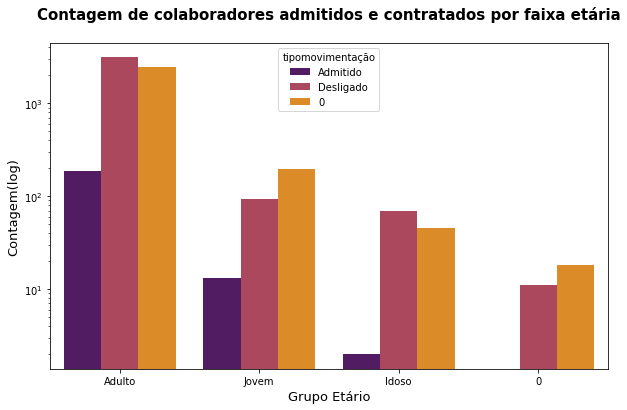

In [30]:
def get_chart():
    ax = sns.countplot(x='idade',hue='tipomovimentação',data = df, palette='inferno')
    ax.set(yscale="log")
    return ax
plot(
    get_chart = get_chart,
    xlabel = "Grupo Etário",
    ylabel = "Contagem(log)",
    title = "Contagem de colaboradores admitidos e contratados por faixa etária" 
)

In [35]:
idade = admitidos
idade=idade[['salário','categoria', 'idade', 'sexo','raçacor']].groupby(['categoria','idade'])\
.mean().sort_values(by='salário', ascending=False).round(2).reset_index()
idade

,categoria,idade,salário
0,"Geral, inclusive o empregado público da admini...",Adulto,4713.36
1,Contrato de trabalho intermitente,Adulto,2597.76
2,Contrato a termo firmado nos termos da Lei 9.6...,Adulto,1960.86
3,Trabalhador rural,Adulto,1321.42
4,"Geral, inclusive o empregado público da admini...",Jovem,1030.65
5,"Geral, inclusive o empregado público da admini...",Idoso,874.50
